In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

# Сигмоида

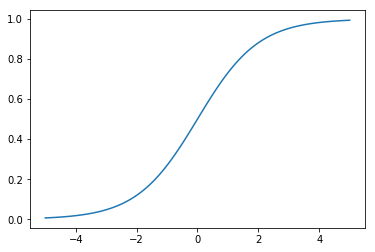

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x))
plt.show()

# Градиентный спуск

In [3]:
def L(w):
    return (w - 6)**2
def L_grad(w):
    return 2 * (w - 6)

gamma = 0.1

w = 7
for i in range(10):
    w = w - gamma * L_grad(w)
    print(w) 

6.8
6.64
6.512
6.4096
6.32768
6.262144
6.2097152
6.16777216
6.134217728
6.1073741824


# Регрессия (обучение на одном примере)

In [4]:
def forward(x, w):
    return sigmoid(np.dot(x, w))

#тут формула градиента полученная символьно
def grad_w(x, w):
    t = np.dot(x, w)
    return sigmoid(t)*(1-sigmoid(t))*x

#тут численное дифференциирование произвольной f
def grad_w_numeric(f, x):
    g = np.zeros_like(x)
    for i in range(len(x)):
        eps = np.zeros_like(x)
        eps[i] = 1e-5
        g[i] = (f(x+eps) - f(x-eps)) / (2 * np.sum(eps))
    return g

n = 5
x = np.random.randn(n)
y = np.random.randint(2, size=1)
w = np.random.randn(n)

p = forward(x, w)

print p, y
print grad_w(x, w)
print grad_w_numeric(lambda w: forward(x, w), w)

0.440723489383 [0]
[ 0.11763996  0.27944346  0.13798642  0.05144842  0.22505755]
[ 0.11763996  0.27944346  0.13798642  0.05144842  0.22505755]


In [5]:
def loss(x, y, w):
    return (forward(x,w) - y)**2

def loss_grad(x, y, w):
    return 2 * (forward(x, w) - y) * grad_w(x, w)

print(loss_grad(x, y, w))
print(grad_w_numeric(lambda w: loss(x, y, w), w))

[ 0.10369339  0.24631459  0.12162771  0.04534905  0.1983763 ]
[ 0.10369339  0.24631459  0.12162771  0.04534905  0.1983763 ]


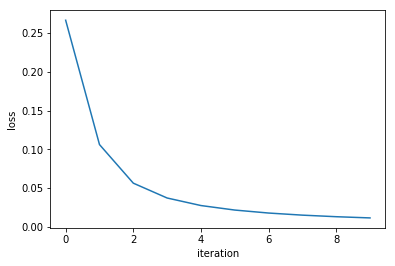

In [6]:
#создаем данные: один пример, 5 фич
n = 5
x = np.random.randn(n)
y = np.random.randint(2, size=1)
w = np.random.randn(n)

n_steps = 10
losses = np.zeros(n_steps)
gamma = 0.5

for i in range(n_steps):
    w = w - gamma * loss_grad(x, y, w)
    losses[i] = loss(x,y,w)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Регрессия (много примеров)

In [7]:
def forward(x, w):
    return sigmoid(np.dot(x, w))

def grad_w(x, w):
    t = np.dot(x, w)
    return sigmoid(t)*(1-sigmoid(t))*x

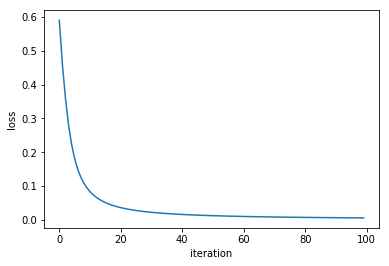

In [8]:
n = 5
k = 4
x = np.random.randn(k, n)
y = np.random.randint(2, size=k)
w = np.random.randn(n)

def forward(x, w):
    return sigmoid(np.dot(x, w.T))

def grad_w(x, w):
    t = np.dot(x, w.T)
    s = sigmoid(t)*(1-sigmoid(t))
    return (x.T * s).T

def loss(x, y, w):
    return np.sum((forward(x,w) - y)**2)

def loss_grad(x, y, w):
    return 2 * np.dot((forward(x, w) - y), grad_w(x, w))

n_steps = 100
losses = np.zeros(n_steps)
gamma = 0.5

for i in range(n_steps):
    w = w - gamma * loss_grad(x, y, w)
    losses[i] = loss(x,y,w)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Регрессия на MNIST

In [9]:
#качаем mnist
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

#
mnist.data = mnist.data / 255.

#выберем только 0 и 1
idx = (mnist.target == 0) + (mnist.target == 1)
mnist_binary_data = mnist.data[idx]
mnist_binary_target = mnist.target[idx]

#перемешиваем
from sklearn.utils import shuffle
mnist_binary_data, mnist_binary_target = shuffle(mnist_binary_data, mnist_binary_target)

#нарезаем test и train
x = mnist_binary_data[:1000]
y = mnist_binary_target[:1000]
x_test = mnist_binary_data[1000:]
y_test = mnist_binary_target[1000:]

In [10]:
n = 784
k = 1000
w = np.random.randn(n)

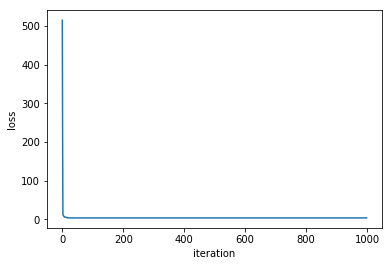

In [11]:
n_steps = 1000
losses = np.zeros(n_steps)
gamma = 0.1

for i in range(n_steps):
    w = w - gamma * loss_grad(x, y, w)
    losses[i] = loss(x,y,w)

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [12]:
prediction = forward(x, w) > 0.5
print(np.mean(prediction == y))

0.996


In [13]:
prediction = forward(x_test, w) > 0.5
print(np.mean(prediction == y_test))

0.994484760522


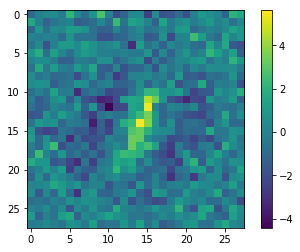

In [14]:
plt.imshow(w.reshape((28, 28)))
plt.colorbar()
plt.show()